# Netflix Movies & TV Shows

Dataset: *Netflix Movies and TV Shows* from Kaggle  
File required in the working directory: **`netflix_titles.csv`**

## Objectives
- Explore dataset structure  
- Analyze content distribution (Movies vs TV Shows)  
- Explore release year trends  
- Identify the most common countries and genres  
- Analyze movie durations and TV show seasons  
- Apply **KMeans clustering** to identify movie groups based on duration and release year  


In [5]:
# Imports libraries

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

sns.set(style="whitegrid", context="notebook")


In [6]:
# load Netflix DF

netflix_path = "netflix_titles.csv"
df = pd.read_csv(netflix_path)

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
#Dataset Exploration

#- Dataset structure
#- Missing values
#- Data types


print("=== Info ===")
df.info()

print("\n=== Missing values per column ===")
print(df.isna().sum())

print("\n=== Descriptive statistics (numeric only) ===")
print(df.describe())


=== Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

=== Missing values per column ===
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration       

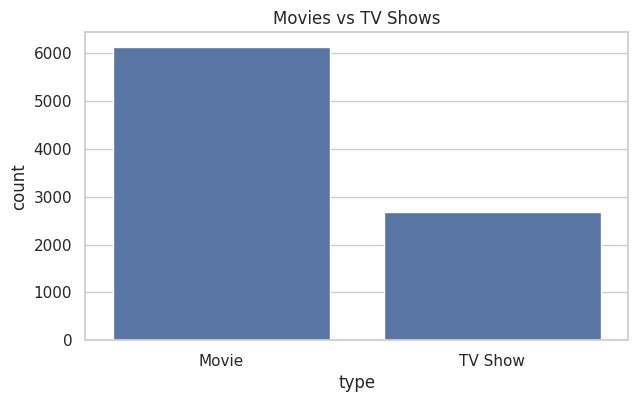

Percentage by type:
type
Movie      69.615079
TV Show    30.384921
Name: proportion, dtype: float64


In [8]:
#Distribution

plt.figure(figsize=(7, 4))
sns.countplot(data=df, x="type")
plt.title("Movies vs TV Shows")
plt.show()

print("Percentage by type:")
print(df["type"].value_counts(normalize=True) * 100)


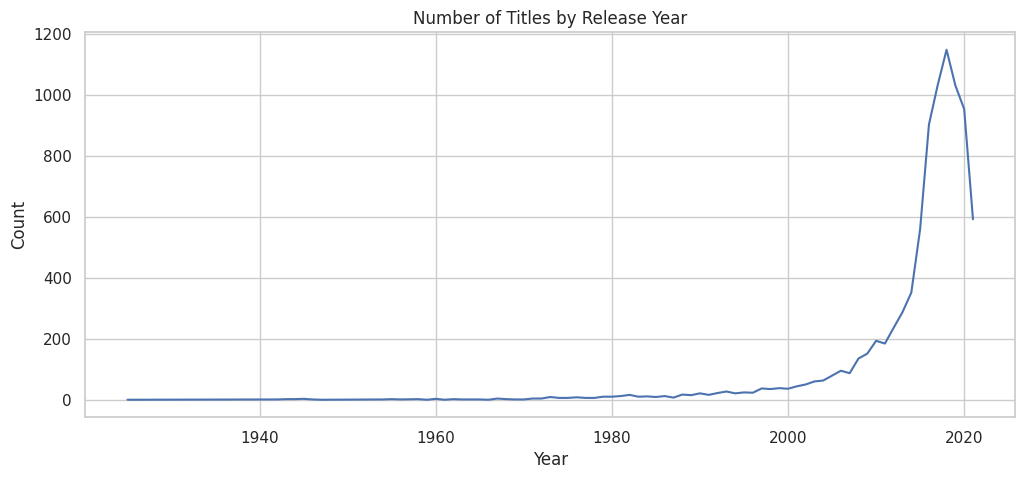

In [9]:
#Release Year Trends
plt.figure(figsize=(12, 5))
df["release_year"].value_counts().sort_index().plot(kind="line")

plt.title("Number of Titles by Release Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

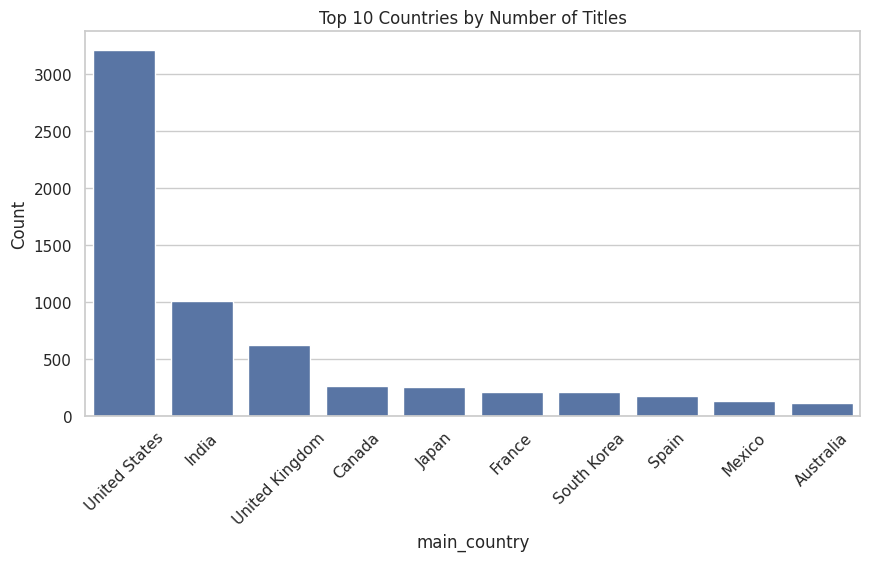

In [10]:
# Countries Producing Content
# take the first listed country (many rows contain multiple countries).

df["main_country"] = df["country"].dropna().apply(lambda x: x.split(",")[0].strip())

top_countries = df["main_country"].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.index, y=top_countries.values)

plt.title("Top 10 Countries by Number of Titles")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()



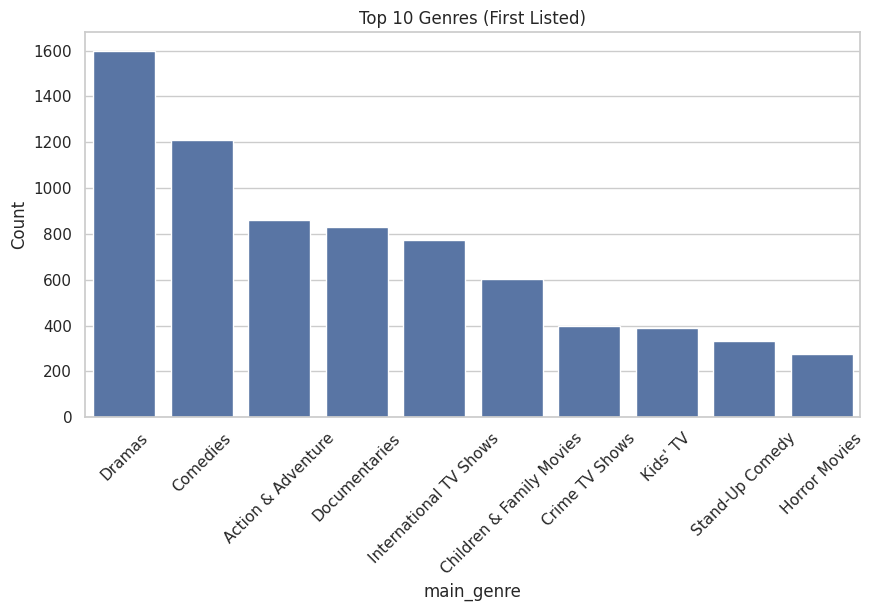

In [11]:
# Genre / Category Analysis

# The column listed_in often contains multiple genres.
# Extract the first one for simplicity.

df["main_genre"] = df["listed_in"].dropna().apply(lambda x: x.split(",")[0].strip())

top_genres = df["main_genre"].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_genres.index, y=top_genres.values)

plt.title("Top 10 Genres (First Listed)")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()


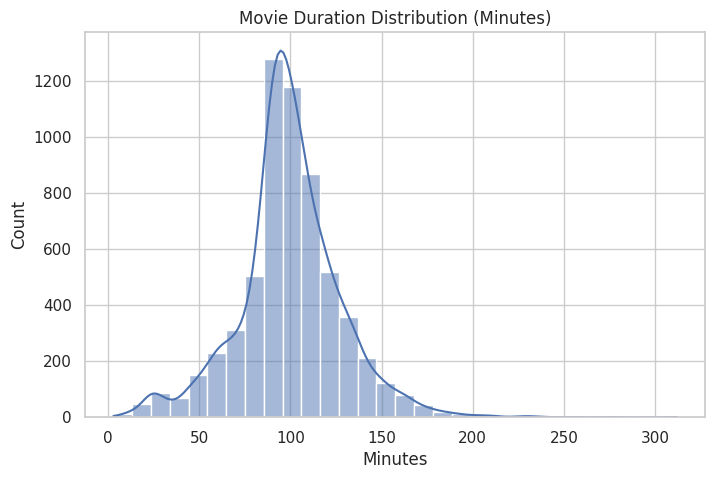

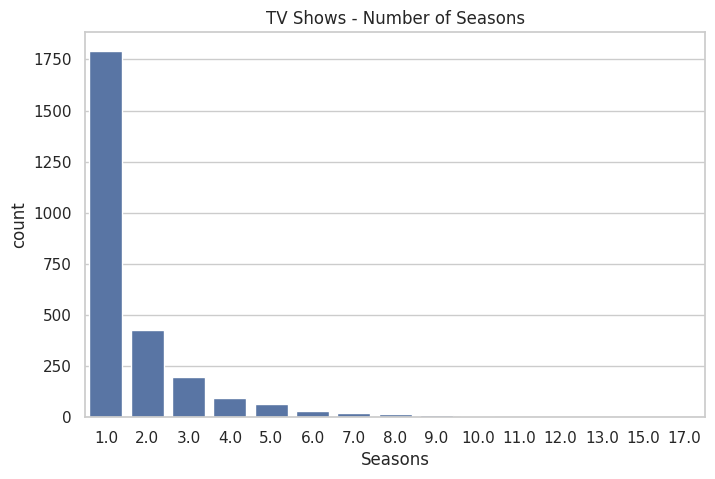

In [12]:
# Duration
# - Movies: duration in minutes
# - TV Shows: number of seasons


def parse_duration(value):
    """Extract numeric value from duration string."""
    try:
        return int(str(value).split()[0])
    except:
        return np.nan

df["duration_int"] = df["duration"].apply(parse_duration)

movies = df[df["type"] == "Movie"].copy()
shows = df[df["type"] == "TV Show"].copy()

# Movie duration
plt.figure(figsize=(8, 5))
sns.histplot(movies["duration_int"], bins=30, kde=True)
plt.title("Movie Duration Distribution (Minutes)")
plt.xlabel("Minutes")
plt.show()

# TV Show seasons
plt.figure(figsize=(8, 5))
sns.countplot(x=shows["duration_int"])
plt.title("TV Shows - Number of Seasons")
plt.xlabel("Seasons")
plt.show()



Movie Clustering (Unsupervised ML)

Cluster movies based on:

- **Release year**  
- **Duration (minutes)**  

The Purpose: discover groups such as old/short movies, modern/long movies, etc.


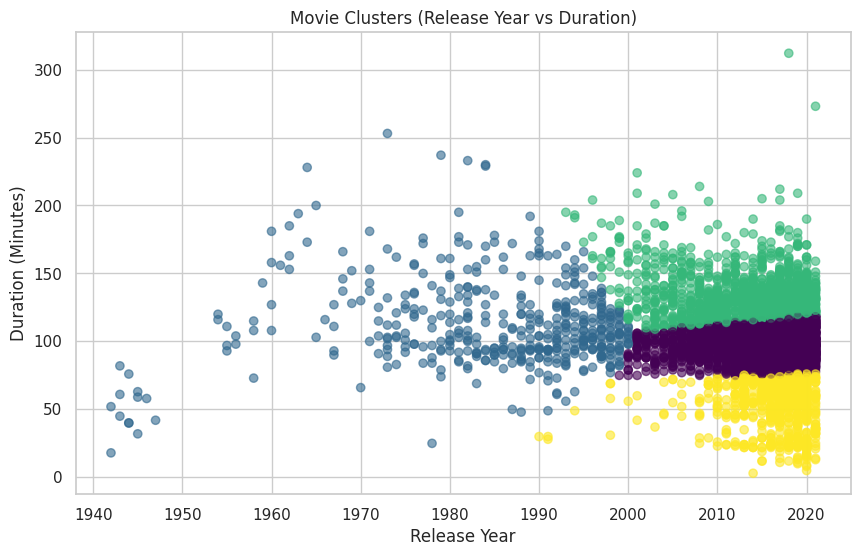

Cluster average values:
         release_year  duration_int
cluster                            
0         2015.806780     96.732486
1         1985.199552    112.677130
2         2013.025377    134.397304
3         2016.601589     54.536890

Cluster counts:
cluster
0    3540
2    1261
3     881
1     446
Name: count, dtype: int64


In [13]:
movies_cluster = movies.dropna(subset=["duration_int", "release_year"]).copy()

X = movies_cluster[["release_year", "duration_int"]].values

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
movies_cluster["cluster"] = kmeans.fit_predict(X_scaled)

# Plot clusters
plt.figure(figsize=(10, 6))
plt.scatter(
    movies_cluster["release_year"],
    movies_cluster["duration_int"],
    c=movies_cluster["cluster"],
    cmap="viridis",
    alpha=0.6
)

plt.title("Movie Clusters (Release Year vs Duration)")
plt.xlabel("Release Year")
plt.ylabel("Duration (Minutes)")
plt.show()

# Cluster summaries
print("Cluster average values:")
print(movies_cluster.groupby("cluster")[["release_year", "duration_int"]].mean())

print("\nCluster counts:")
print(movies_cluster["cluster"].value_counts())


# Conclusions

Clustering reveals meaningful groups of movies
Using KMeans on release year and duration:

- Cluster 0 → Older movies with shorter durations
- Cluster 1 → Modern movies with typical durations
- Cluster 2 → Long movies across different years
- Cluster 3 → Very new, shorter films or specials

Conclusion:

Movie content can be grouped into distinct categories based on temporal trends and duration patterns, providing insight into production evolution over time.